Customers.csv Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Transactions.csv Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,10-07-2022
1,C0002,Elizabeth Lutz,Asia,13-02-2022
2,C0003,Michael Rivera,South America,07-03-2024
3,C0004,Kathleen Rodriguez,South America,09-10-2022
4,C0005,Laura Weber,Asia,15-08-2022


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,25-08-2024 12:38,1,300.68,300.68
1,T00112,C0146,P067,27-05-2024 22:23,1,300.68,300.68
2,T00166,C0127,P067,25-04-2024 07:38,1,300.68,300.68
3,T00272,C0087,P067,26-03-2024 22:55,2,601.36,300.68
4,T00363,C0070,P067,21-03-2024 15:10,3,902.04,300.68


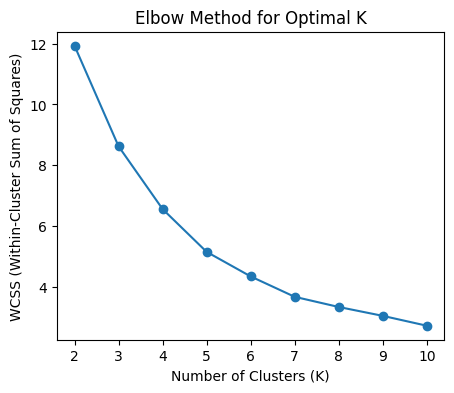

Davies-Bouldin Index: 0.9052


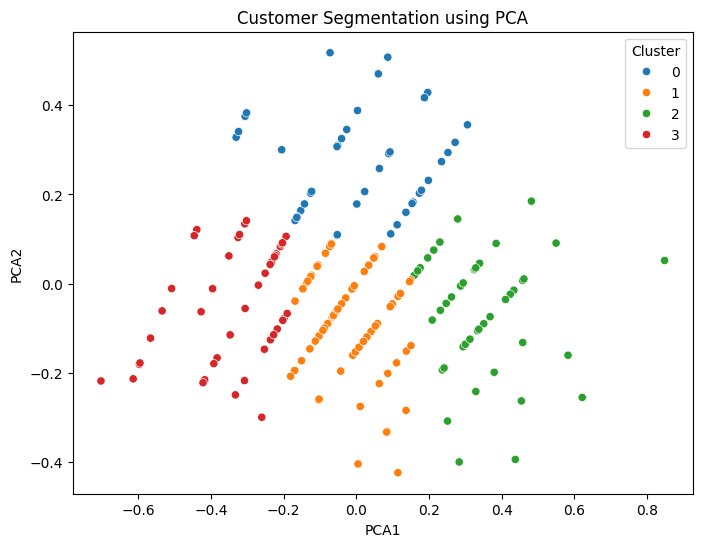

<ipython-input-13-520c4d6feca3>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=customer_data_scaled, palette="tab10")


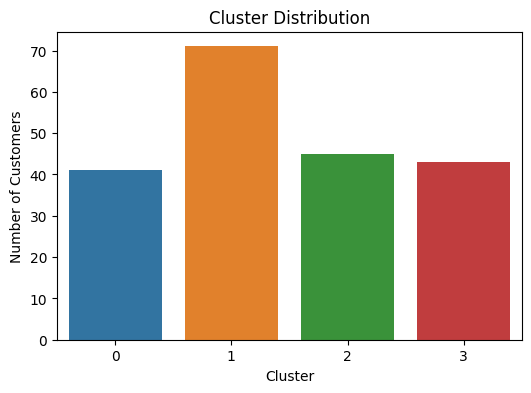

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

# Step 2: Load Data
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# It will inspect Data
print("Customers.csv Columns:", customers.columns.tolist())
print("Transactions.csv Columns:", transactions.columns.tolist())
display(customers.head(), transactions.head())

#It will aggregate the Transactions (Summarizing per Customer)
transaction_summary = transactions.groupby("CustomerID").agg(
    total_spend=("TotalValue", "sum"),
    avg_spend=("TotalValue", "mean"),
    total_transactions=("TransactionID", "count")
).reset_index()

# Merge with Customer Data
customer_data = customers.merge(transaction_summary, on="CustomerID", how="left")
customer_data.fillna(0, inplace=True)  # Fill missing values

# It selects the  Features for Clustering (only available features)
features = ["total_spend", "avg_spend", "total_transactions"]

# Normalization of  Data
scaler = MinMaxScaler()
customer_data_scaled = customer_data.copy()
customer_data_scaled[features] = scaler.fit_transform(customer_data[features])


#K-Means Clustering (Finding Optimal K using WCSS)
wcss = []  # Within-Cluster Sum of Squares
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_data_scaled[features])
    wcss.append(kmeans.inertia_)  # Corrected metric

# Plot Elbow Method
plt.figure(figsize=(5, 4))
plt.plot(K_range, wcss, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Apply K-Means with Optimal K
optimal_k = 4  # Choose best K from elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data_scaled["Cluster"] = kmeans.fit_predict(customer_data_scaled[features])

# Evaluating  Clustering with Davies-Bouldin Index
db_index = davies_bouldin_score(customer_data_scaled[features], customer_data_scaled["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.4f}")

# Visualizing the clusters with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customer_data_scaled[features])
customer_data_scaled["PCA1"] = pca_result[:, 0]
customer_data_scaled["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="tab10", data=customer_data_scaled)
plt.title("Customer Segmentation using PCA")
plt.show()

# This is Cluster Count distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Cluster", data=customer_data_scaled, palette="tab10")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Cluster Distribution")
plt.show()







Customers.csv Columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Transactions.csv Columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']


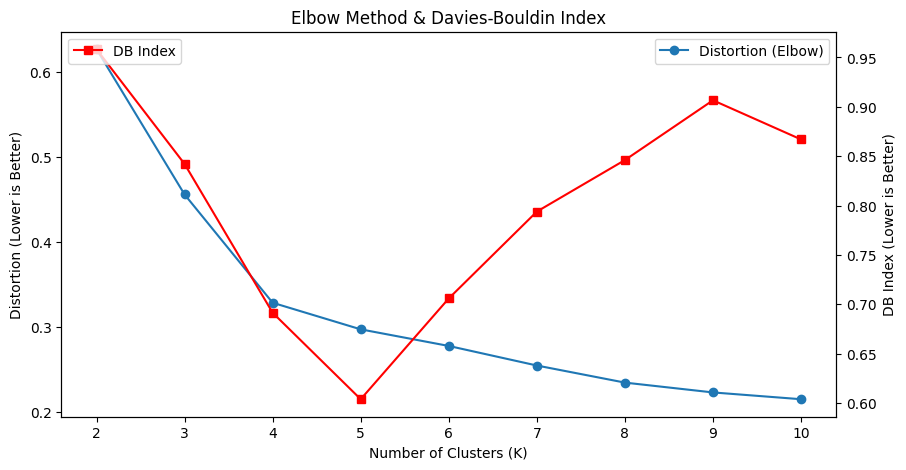

Optimal K: 5
Davies-Bouldin Index: 0.6038251031069202


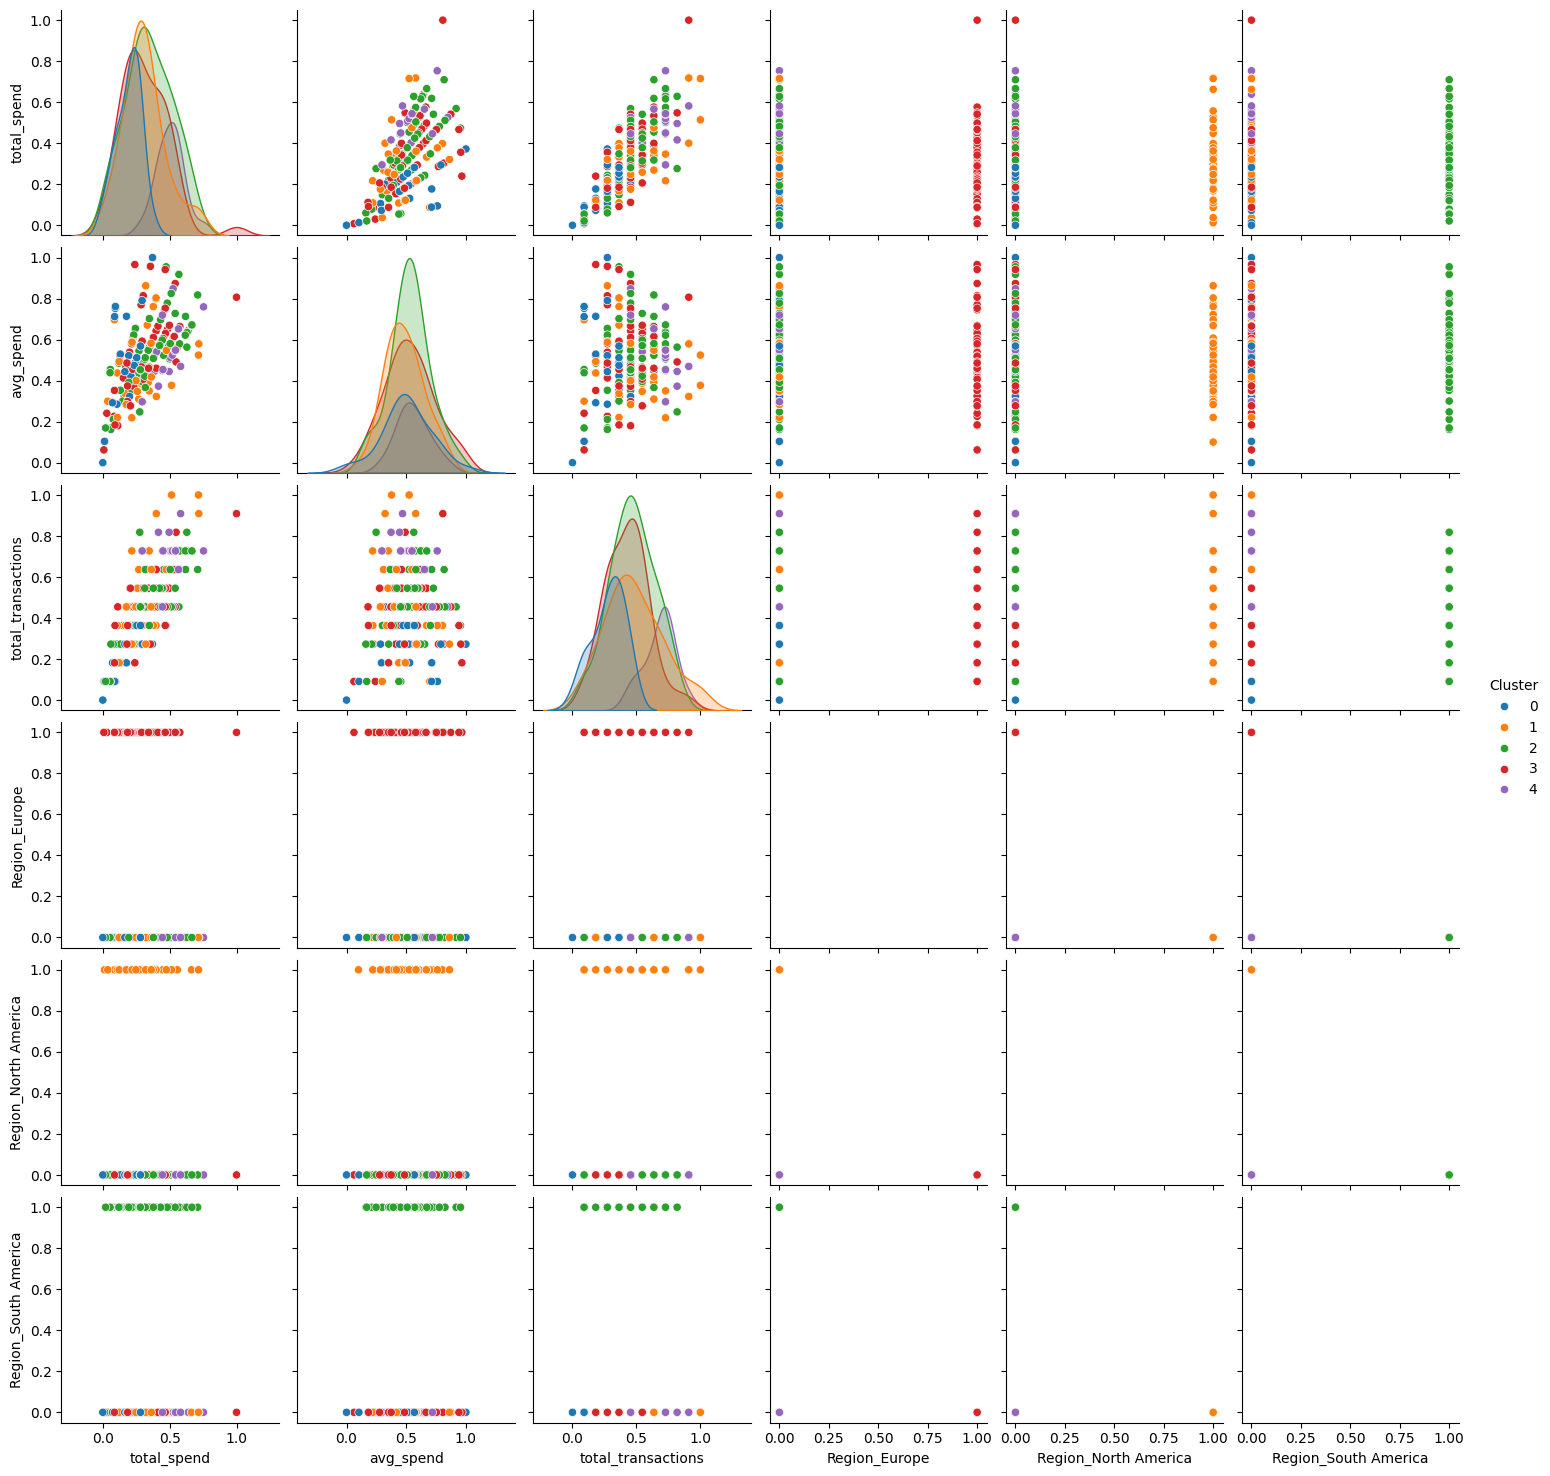

📊 Cluster Summary:
          total_spend  avg_spend  total_transactions  total_transactions  \
Cluster                                                                   
0           0.191699   0.503374            0.279461            0.279461   
1           0.310212   0.483668            0.482213            0.482213   
2           0.348312   0.529552            0.468413            0.468413   
3           0.311517   0.526252            0.425455            0.425455   
4           0.503974   0.556473            0.681818            0.681818   

         Region_Europe  Region_North America  Region_South America  
Cluster                                                             
0                  0.0                   0.0                   0.0  
1                  0.0                   1.0                   0.0  
2                  0.0                   0.0                   1.0  
3                  1.0                   0.0                   0.0  
4                  0.0                  

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from scipy.spatial.distance import cdist




print("Customers.csv Columns:", customers.columns.tolist())
print("Transactions.csv Columns:", transactions.columns.tolist())


transaction_summary = transactions.groupby("CustomerID").agg(
    total_spend=("TotalValue", "sum"),
    avg_spend=("TotalValue", "mean"),
    total_transactions=("TransactionID", "count")
).reset_index()


customer_data = customers.merge(transaction_summary, on="CustomerID", how="left")
customer_data.fillna(0, inplace=True)


customer_data = pd.get_dummies(customer_data, columns=["Region"], drop_first=True)


features = ["total_spend", "avg_spend", "total_transactions"] + list(customer_data.columns[-(len(customer_data.columns) - 5):])


scaler = MinMaxScaler()
customer_data_scaled = customer_data.copy()
customer_data_scaled[features] = scaler.fit_transform(customer_data[features])


distortions = []
db_indexes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_data_scaled[features])

    distortions.append(sum(np.min(cdist(customer_data_scaled[features], kmeans.cluster_centers_, "euclidean"), axis=1)) / customer_data_scaled[features].shape[0])
    db_indexes.append(davies_bouldin_score(customer_data_scaled[features], kmeans.labels_))


fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(K_range, distortions, marker="o", label="Distortion (Elbow)")
ax2.plot(K_range, db_indexes, marker="s", color="red", label="DB Index")

ax1.set_xlabel("Number of Clusters (K)")
ax1.set_ylabel("Distortion (Lower is Better)")
ax2.set_ylabel("DB Index (Lower is Better)")
ax1.set_title("Elbow Method & Davies-Bouldin Index")

ax1.legend(loc="upper right")
ax2.legend(loc="upper left")
plt.show()


optimal_k = K_range[np.argmin(db_indexes)]
print(f"Optimal K: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data_scaled["Cluster"] = kmeans.fit_predict(customer_data_scaled[features])


db_index = davies_bouldin_score(customer_data_scaled[features], customer_data_scaled["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")


sns.pairplot(customer_data_scaled, hue="Cluster", diag_kind="kde", palette="tab10")
plt.show()


cluster_summary = customer_data_scaled.groupby("Cluster")[features].mean()
print("📊 Cluster Summary:\n", cluster_summary)


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(customer_data_scaled[features], customer_data_scaled["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.3487
